In [57]:
import warnings
warnings.filterwarnings("ignore")

### 01. Plot

In [58]:
import pandas as pd

df = pd.read_excel('./data/남북한발전전력량.xlsx', engine='openpyxl')
print(df.iloc[[0,1], 2:])

   1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2007  \
0  1077  1186  1310  1444  1650  1847  2055  2244  2153  2393  ...  4031   
1    64    51    49    60    41    55    52    54    61    61  ...    50   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  

[2 rows x 27 columns]


In [59]:
df_ns = df.iloc[[0,5], 2:] # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South', 'North'] # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) #'1991' 같이 문자열로 나와 있는 내용을 숫자로 바꿔주는 역할. 
df_ns

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
North,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239


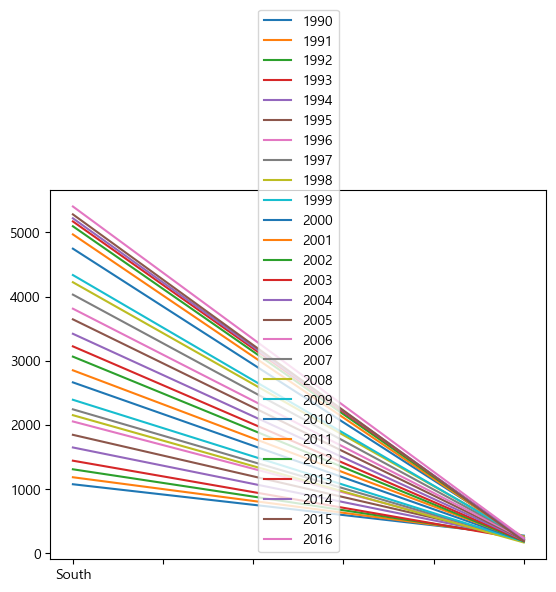

In [60]:
# 선 그래프 그리기
import matplotlib.pyplot as plt

df_ns.plot()
plt.show()

     South North
1990  1077   277
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231




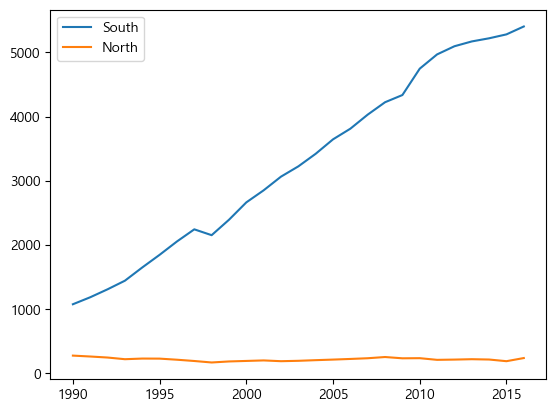

In [61]:
# 행열 전치하여 다시 그리기
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')
tdf_ns.plot()
plt.show()

* 막대 그래프

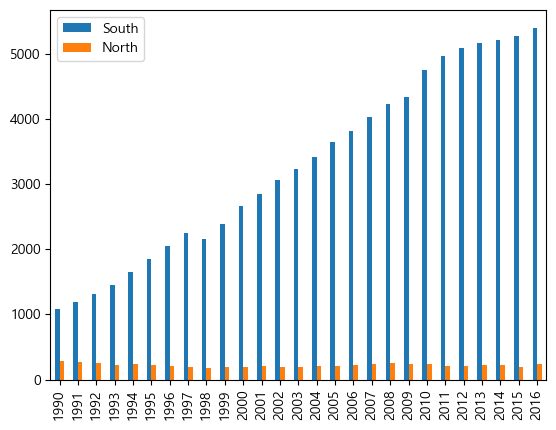

In [62]:
import pandas as pd

df = pd.read_excel('./data/남북한발전전력량.xlsx', engine='openpyxl')
# print(df.iloc[[0,1], 2:])

df_ns = df.iloc[[0,5], 2:] # 남한, 북한 발전량 합계 데이터만 추출
df_ns.index = ['South', 'North'] # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) #'1991' 같이 문자열로 나와 있는 내용을 숫자로 바꿔주는 역할. 

tdf_ns = df_ns.T
# print(tdf_ns.head())
# print('\n')

tdf_ns.plot(kind='bar')
plt.show()

* 히스토그램

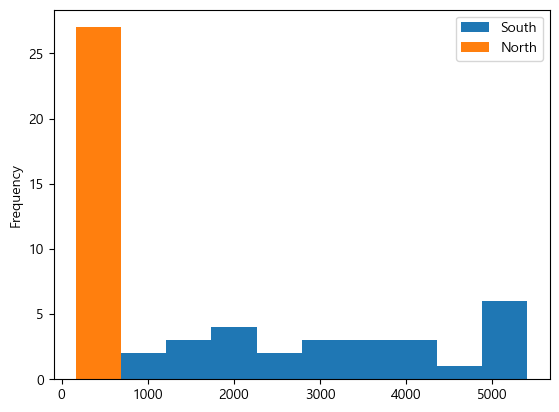

In [63]:
tdf_ns['North'] = pd.to_numeric(tdf_ns['North'])
tdf_ns['South'] = pd.to_numeric(tdf_ns['South'])

tdf_ns.plot(kind='hist')
plt.show()
#x축 : 발전량을 일정한 간격을 갖는 여러 구간으로 나눈 것(bins). 
#Y축 : 연간 발전량이 x축에서 나눈 발전량 구간에 속하는 연도의 수를 빈도로 나타낸 것.

* 산점도

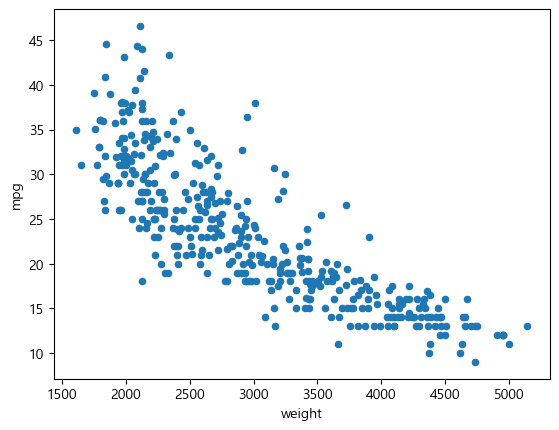

In [64]:
import pandas as pd
df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

#2개의 열을 선택하여 사넘도 그리기
df.plot(x='weight', y='mpg', kind='scatter')
plt.show()

* 박스 플롯
    * 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

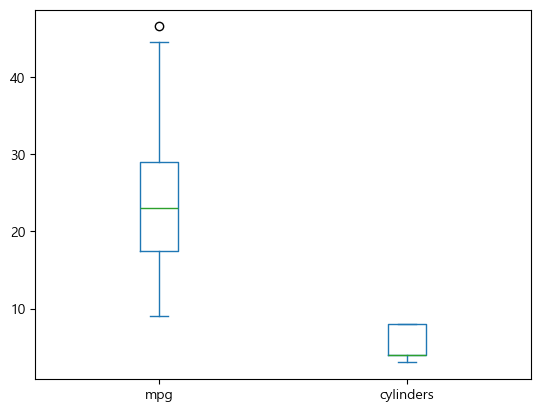

In [65]:
df[['mpg', 'cylinders']].plot(kind='box')
plt.show()

#각 변수들의 데이터가 퍼져 있는 정도를 확인할 때 사용

### 02. Matplotlib

##### 02-1 선 그래프

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

#누락값(NAN)을 앞 데이터로 채움
df = df.fillna(method='ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [67]:
# 서울에서 다른 지역(전입지)으로 이동한 데이터만 추출하여 정리

mask = (df['전출지별'] == '서울특별시') & (df['전입지별']!='서울특별시')

df_seoul = df[mask]

#전출지별 열 삭제
df_seoul = df_seoul.drop(['전출지별'], axis=1)

#전입지별 열 이름 => 전입지로 변경
df_seoul = df_seoul.rename({'전입지별':"전입지"}, axis=1)

#전입지를 index로 설정
df_seoul.set_index('전입지',inplace=True )

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

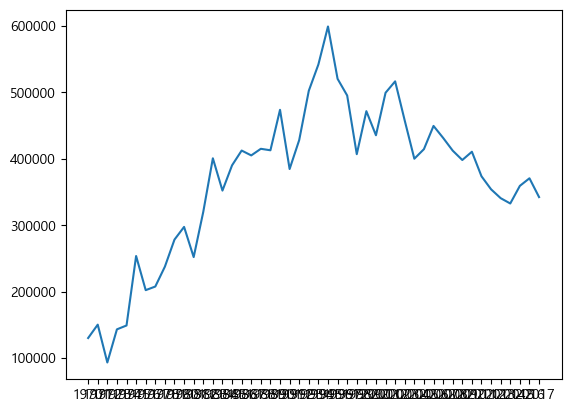

In [68]:
plt.plot(sr_one.index, sr_one.values)
plt.show()

In [69]:
# 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

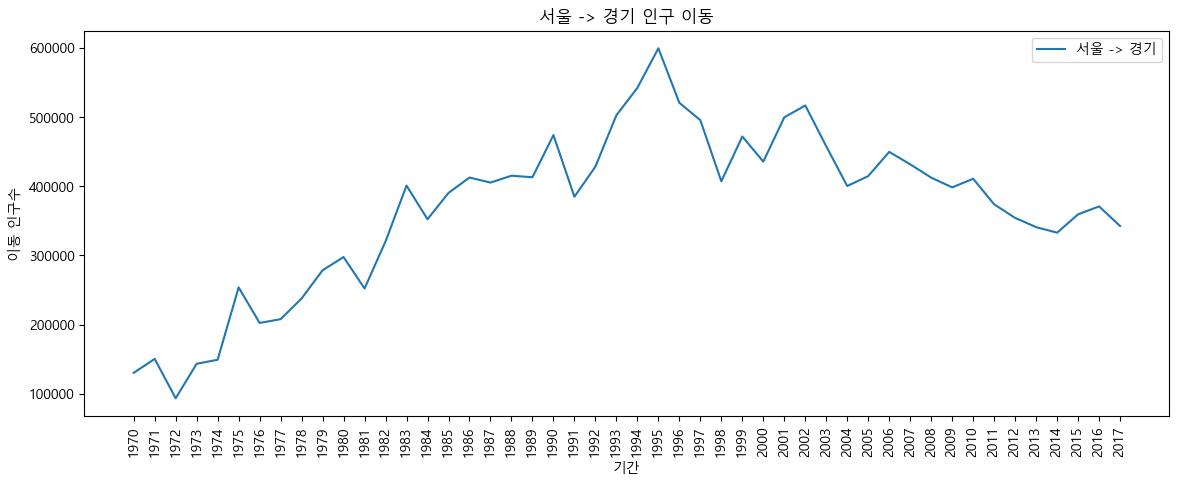

In [71]:
plt.figure(figsize=(14,5))

#x축 눈금 라벨 회전
plt.xticks(rotation='vertical')

#차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

#축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

#범례 
plt.plot(sr_one, label=['서울 -> 경기'])
plt.legend( loc='best')

plt.show()

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc

font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)


df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

#누락값(NAN)을 앞 데이터로 채움
df = df.fillna(method='ffill')

# 서울에서 다른 지역(전입지)으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별']!='서울특별시')

df_seoul = df[mask]

#전출지별 열 삭제
df_seoul = df_seoul.drop(['전출지별'], axis=1)

#전입지별 열 이름 => 전입지로 변경
df_seoul = df_seoul.rename({'전입지별':"전입지"}, axis=1)

#전입지를 index로 설정
df_seoul.set_index('전입지',inplace=True )

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']


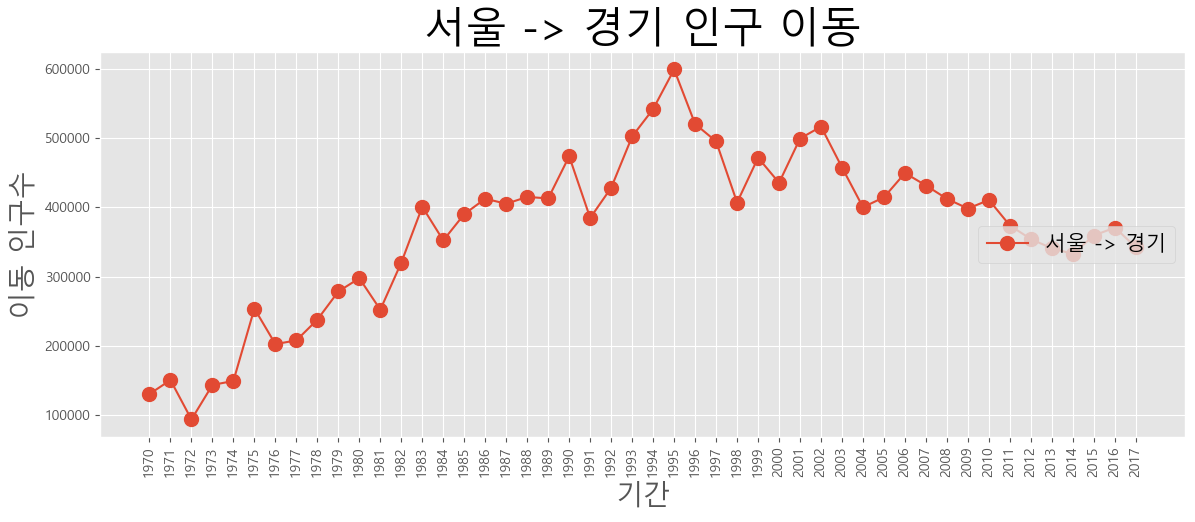

In [77]:
plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc=7, fontsize=15)   #범례 표시
plt.show()

In [78]:
#스타일 리스트 출력 
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


* annotate

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc

font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)


df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

#누락값(NAN)을 앞 데이터로 채움
df = df.fillna(method='ffill')

# 서울에서 다른 지역(전입지)으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별']!='서울특별시')

df_seoul = df[mask]

#전출지별 열 삭제
df_seoul = df_seoul.drop(['전출지별'], axis=1)

#전입지별 열 이름 => 전입지로 변경
df_seoul = df_seoul.rename({'전입지별':"전입지"}, axis=1)

#전입지를 index로 설정
df_seoul.set_index('전입지',inplace=True )

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

C:\Users\USER\AppData\Local\Temp\ipykernel_16868\2463933970.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


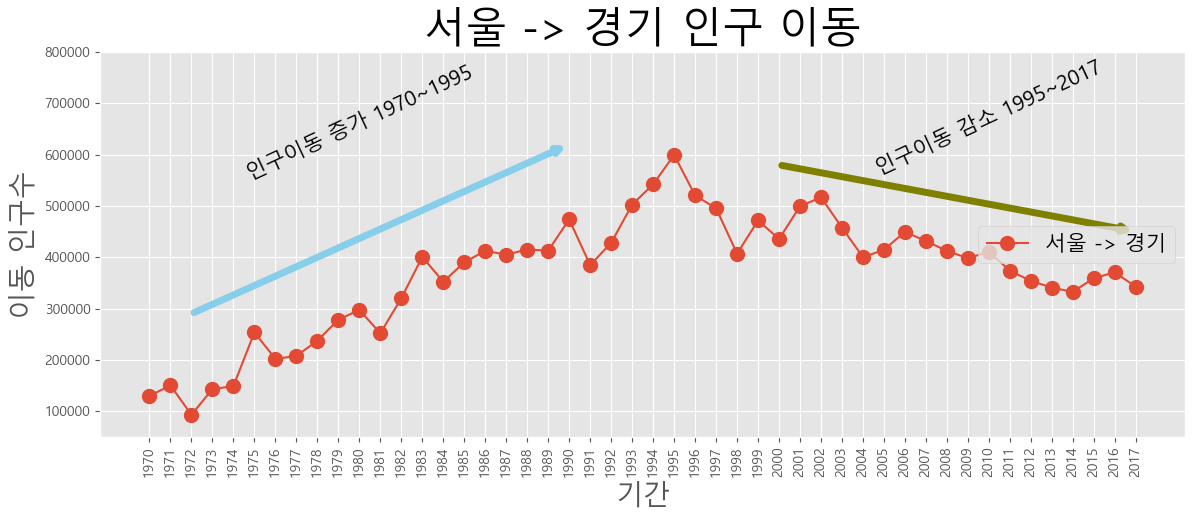

In [11]:
plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14, 5))
plt.xticks(size=10, rotation='vertical')

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)  # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc=7, fontsize=15)   #범례 표시

#Y축 범위 지정( 최소, 최대값 )
plt.ylim(50000, 800000)

plt.annotate( 
    '',                         # 텍스트 없음
    xy=(20,620000),             # 화살표의 머리(끝점)좌표
    xytext=(2,290000),          # 화살표의 꼬리(시작점) 좌표
    xycoords= 'data',           # 좌표계를 데이터 좌표계로 지정
    arrowprops= dict(           # 화살표 속성 정의 
        arrowstyle = '->',      # 화살표 스타일 (꺾인 화살표) 
        color = 'skyblue',      # 화살표 색상 
        lw=5                    # 화살표 선 굵기 
    )
)

plt.annotate( 
    '',                         # 
    xy=(47,450000),             # 화살표의 머리(끝점)좌표
    xytext=(30,580000),         # 화살표의 꼬리(시작점) 좌표
    xycoords= 'data',           # 좌표계를 데이터 좌표계로 지정
    arrowprops= dict(           # 화살표 속성 정의 
        arrowstyle = '->',      # 화살표 스타일 (꺾인 화살표) 
        color = 'olive',        # 화살표 색상 
        lw=5                    # 화살표 선 굵기 
    )
)

plt.annotate( 
    '인구이동 증가 1970~1995',              
    xy=(10,550000),             # 화살표의 머리(끝점)좌표
    rotation=25,                # 텍스트 회전 각도
    va='baseline',              # 텍스트 상하정렬 
    ha= 'center',               # 텍스트 좌우 정렬 
    fontsize = 15,              # 텍스트 크기 
)

plt.annotate( 
    '인구이동 감소 1995~2017',              
    xy=(40,560000),             # 화살표의 머리(끝점)좌표
    rotation=25,                # 텍스트 회전 각도
    va='baseline',              # 텍스트 상하정렬 
    ha= 'center',               # 텍스트 좌우 정렬 
    fontsize = 15,              # 텍스트 크기 
)

plt.show()

# 결과 : 서울 특별시와 경기도 간의 이동 변화를 보면 
# 1970년대 부터 1995년까지는 경기도권 5대 신도시(분당, 일산동) 개발로 서울 인구의 대규모 경기도
# 유입이 있었음을 추청할 수 있고, 
# 이 시기를 정점으로 서울을 벗어나 경기도권으로 이동하는 인구는 현재까지 계속 감소하는 추세. 

C:\Users\USER\AppData\Local\Temp\ipykernel_16868\708549800.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\USER\AppData\Local\Temp\ipykernel_16868\708549800.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(sr_one.index, rotation=75)


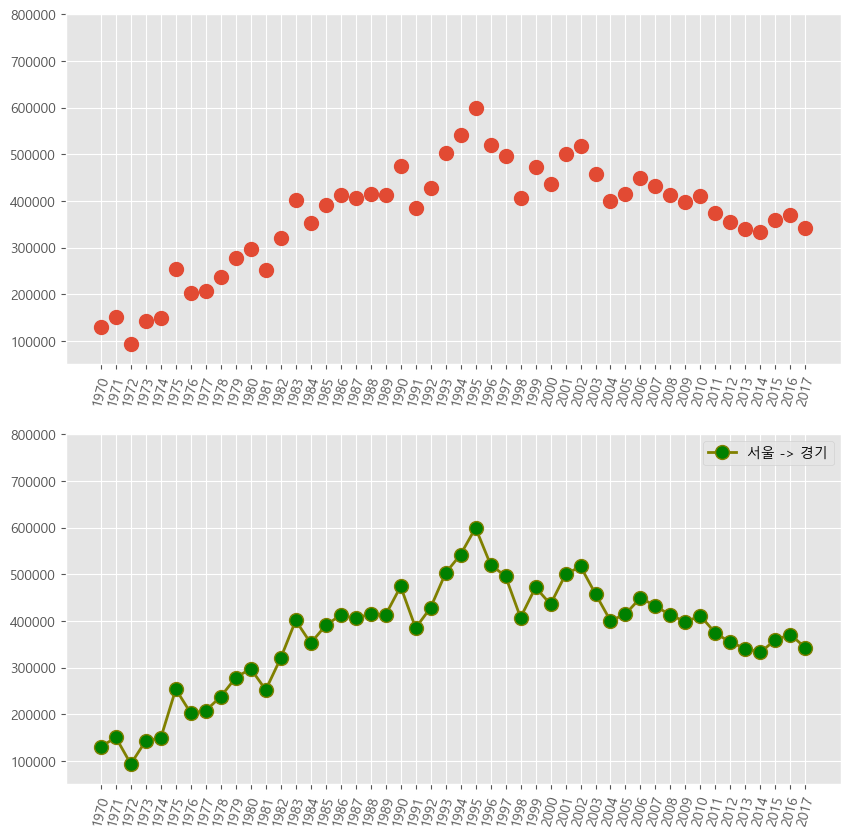

In [14]:
fig = plt.figure(figsize= (10,10)) 
ax1 = fig.add_subplot(2,1,1)   # 2열 2행 2번째 공간
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

#y축 범위 지정 (최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()  # 변경사항 저장하고 그래프 출력

* 서울에서 충청남도, 경상북도, 강원도로 이동한 인구 데이터 값만 선택 

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]

df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':"전입지"}, axis=1)
df_seoul.set_index('전입지',inplace=True )

#서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도']]

df_3.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16868\2311801811.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


C:\Users\USER\AppData\Local\Temp\ipykernel_16868\3188297029.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( loc='best')


<Figure size 2000x500 with 0 Axes>

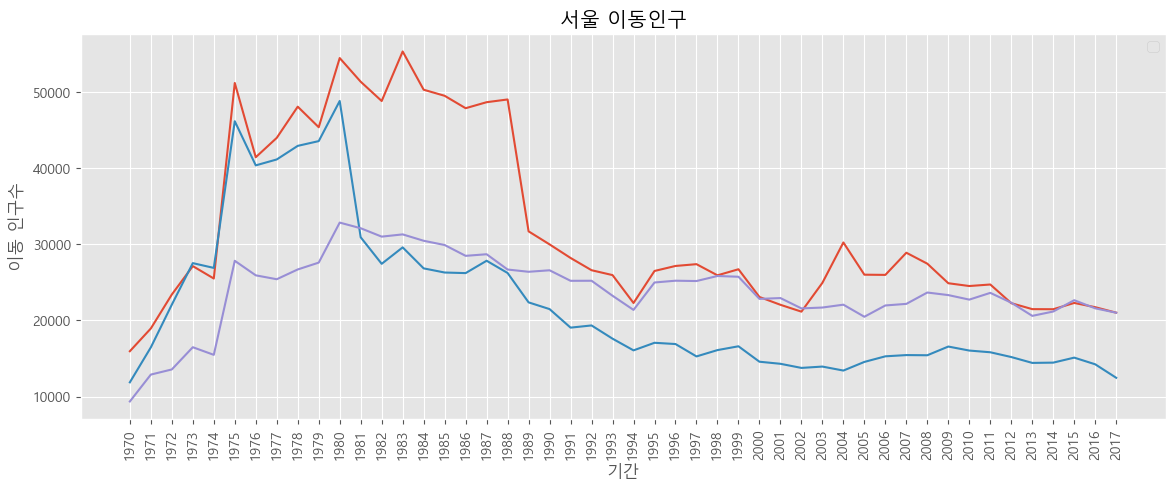

In [44]:
# 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)

tdf_3 = df_3.T 

plt.figure(figsize=(14,5))

#x축 눈금 라벨 회전
plt.xticks(rotation='vertical')

#차트 제목 추가
plt.title('서울 이동인구')

#축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')


#범례 
plt.plot(tdf_3)
plt.legend( loc='best')

plt.show()

In [56]:
# 교수님 답 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]

df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':"전입지"}, axis=1)
df_seoul.set_index('전입지',inplace=True )

#서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도']]

# print(df_3)

plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize = 10, color = 'olive', linewidth=2, label='서울-> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='green', markersize = 10, color = 'skyblue', linewidth=2, label='서울-> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='green', markersize = 10, color = 'magenta', linewidth=2, label='서울-> 강원')

# 범례 표시
ax.legend(loc='best')
# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)
# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)
# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)
# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력



C:\Users\USER\AppData\Local\Temp\ipykernel_16868\4151485279.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\USER\AppData\Local\Temp\ipykernel_16868\4151485279.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(col_years, rotation=90)


<Figure size 2000x500 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt

In [ ]:
df_3.loc['c']

C:\Users\USER\AppData\Local\Temp\ipykernel_16868\3752407053.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\USER\AppData\Local\Temp\ipykernel_16868\3752407053.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(col_years, rotation=90)


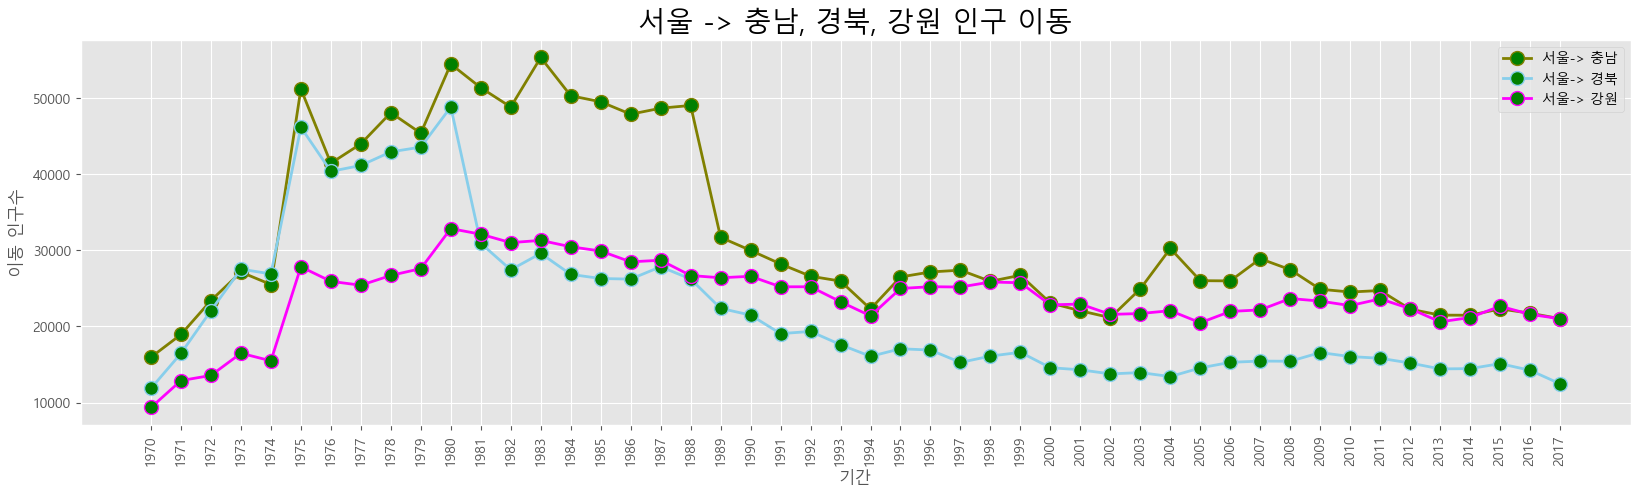

In [73]:
# 교수님 답 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]

df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':"전입지"}, axis=1)
df_seoul.set_index('전입지',inplace=True )

#서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도']]

# print(df_3)

plt.style.use('ggplot') # 스타일 서식 지정
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize = 10, color = 'olive', linewidth=2, label='서울-> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='green', markersize = 10, color = 'skyblue', linewidth=2, label='서울-> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='green', markersize = 10, color = 'magenta', linewidth=2, label='서울-> 강원')

# 범례 표시
ax.legend(loc='best')
# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)
# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)
# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)
# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()  # 변경사항 저장하고 그래프 출력

C:\Users\USER\AppData\Local\Temp\ipykernel_16868\2811882744.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\USER\AppData\Local\Temp\ipykernel_16868\2811882744.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\USER\AppData\Local\Temp\ipykernel_16868\2811882744.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\USER\AppData\Local\Temp\ipykernel_16868\2811882744.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(col_years, rotation=90)


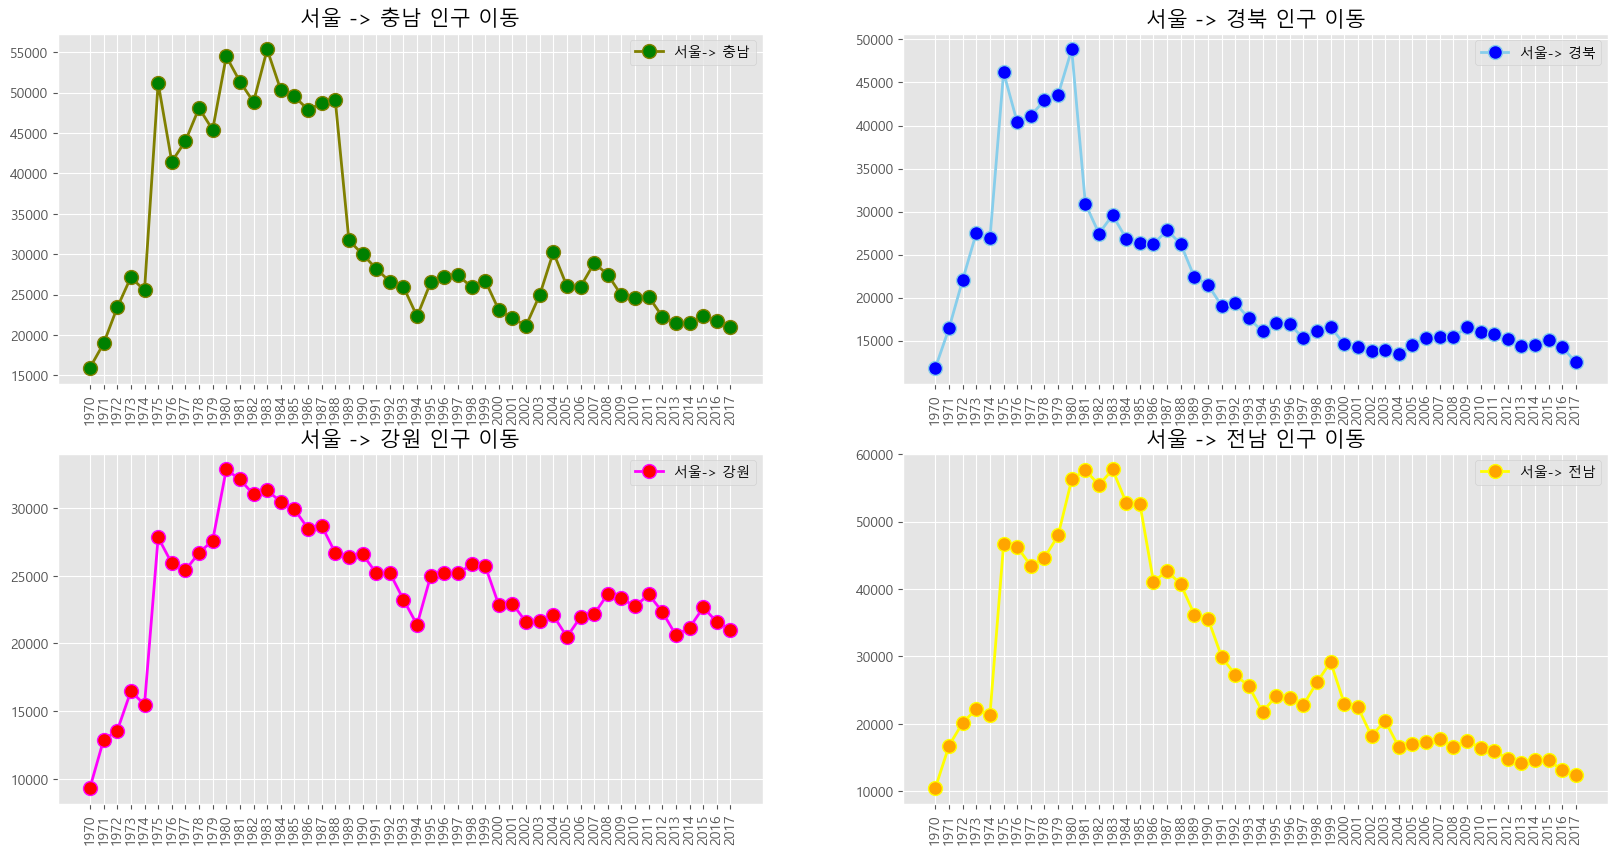

In [81]:
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years ]

plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', markersize = 10, color = 'olive', linewidth=2, label='서울-> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize = 10, color = 'skyblue', linewidth=2, label='서울-> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', markersize = 10, color = 'magenta', linewidth=2, label='서울-> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', markersize = 10, color = 'yellow', linewidth=2, label='서울-> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')
# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)
# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)
plt.show()  # 변경사항 저장하고 그래프 출력


##### 02-2. 면적 그래프

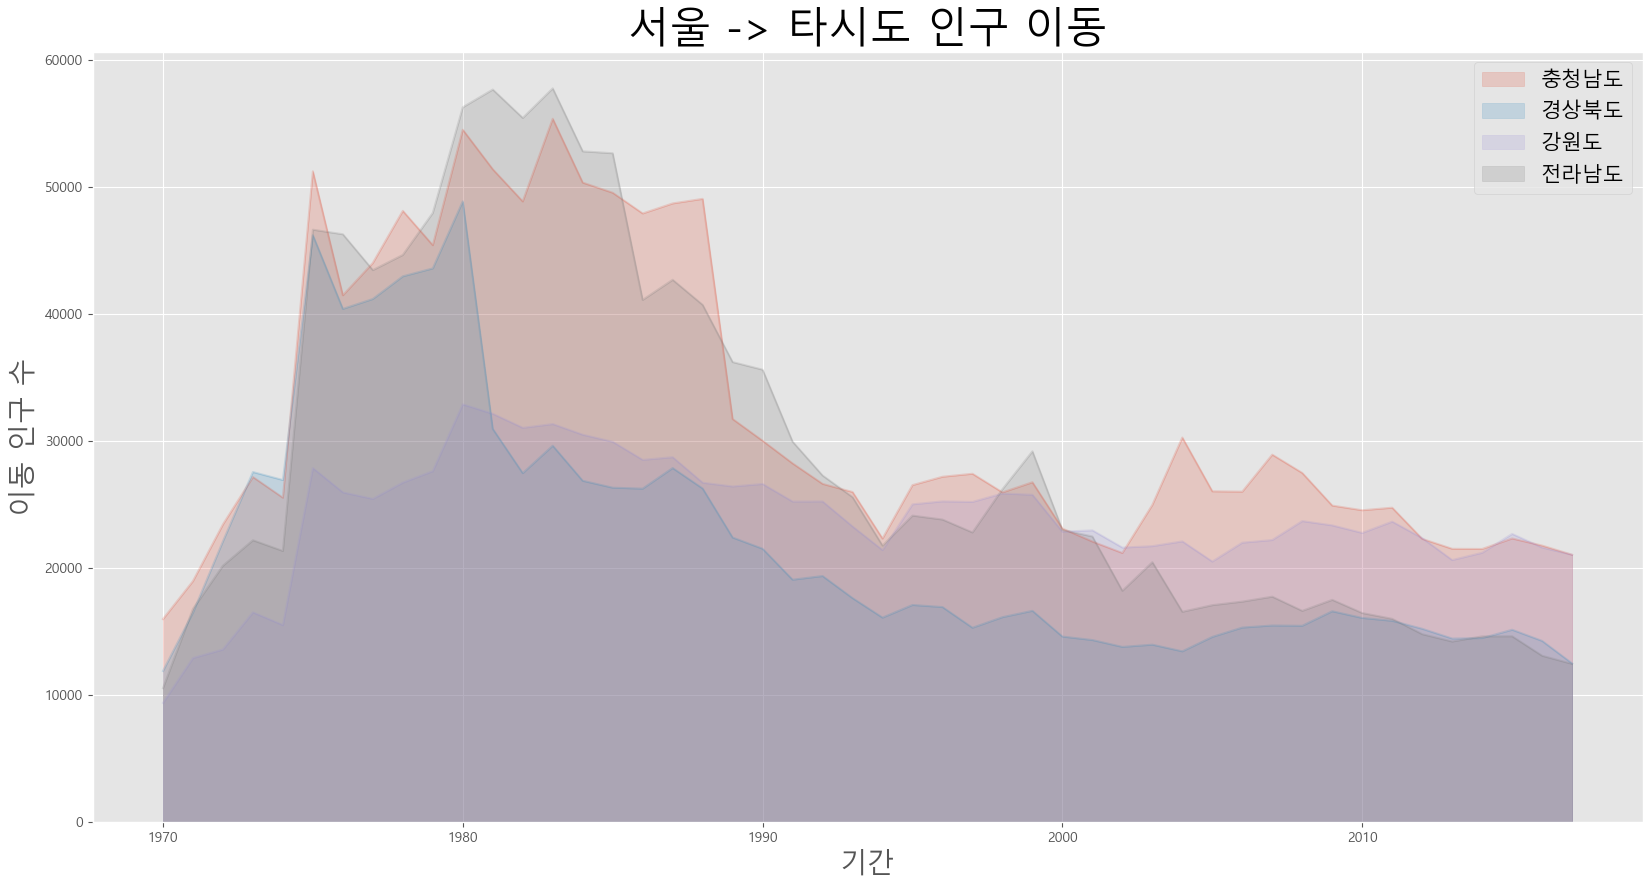

In [86]:
col_years = list(map(str,range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years ]
df_4 = df_4.transpose()

#데이터프레임의 인덱스를 정수형으로 변경
df_4.index=df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

##### 02-3. 막대 그래프

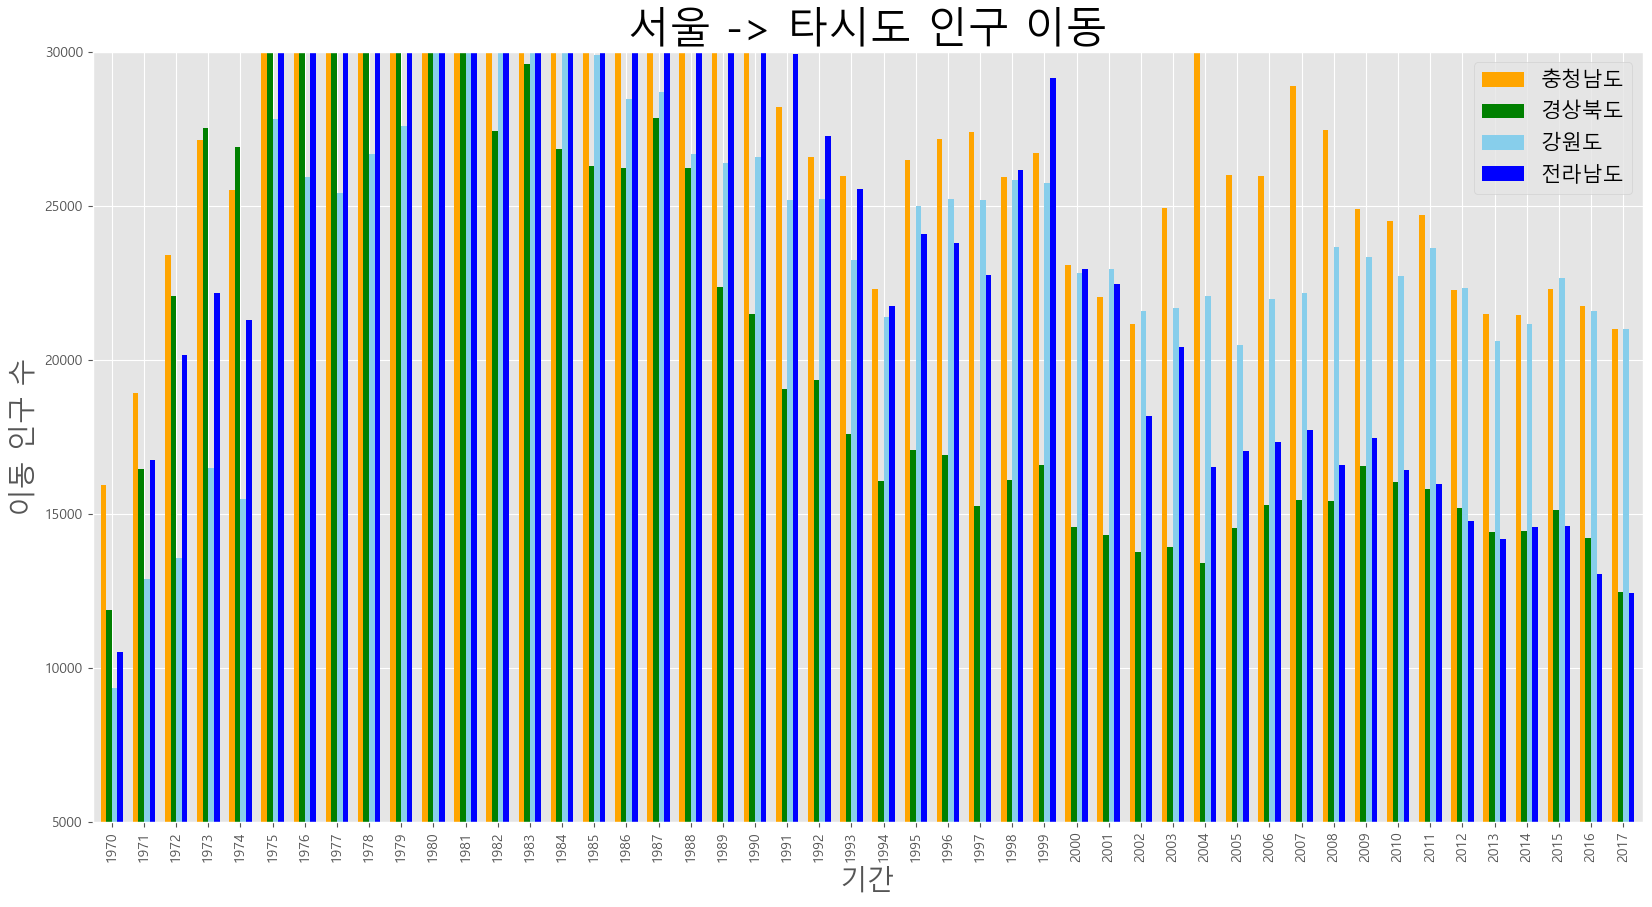

In [92]:
df_4.plot(kind='bar', figsize=(20,10), width=0.7, 
          color=['orange', 'green', 'skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()


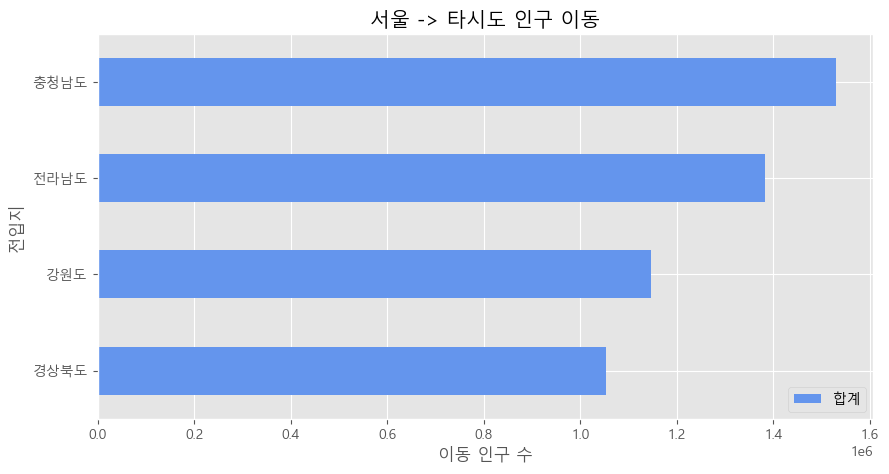

In [140]:
col_years = list(map(str,range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years ]

# 2010-2017년 이동인수 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1) #axis = 1 : 행 방향으로 합계 계산

# 합계 기준 가장 큰 값부터 정렬(내림차순)
df_total= df_4[['합계']].sort_values(by='합계', ascending
= True)

#스타일 서식 지정
plt.style.use('ggplot')

# 수평막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

# 2010~2017년에 이동 인구 합계를 기준으로 서울에서 충청남도로 이동한 사람이 제일 많음
# 다음으로 강원도, 경상북도, 전라남도 순으로 나타남. 

* 북한발전전력량 

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = './data/malgun.ttf' #폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

df = pd.read_excel('./data/남북한발전전력량.xlsx', engine='openpyxl', header=0)
df = df.iloc[5:]

df.drop(['전력량 (억㎾h)'], axis='columns', inplace= True )
df.set_index('발전 전력별', inplace=True)
df=df.T

#증감율(변동률) 계산
df = df.rename(columns={'합계' : "총발전량"})
df['총발전량 -1년'] = df['총발전량'].shift(1) # shift 한칸씩 밀려 밀어넣기
# df['증감율']= (현재년도의 총 발전량/ 이전년도의 총 발전량 -1)*100
df['증감율'] = ((df['총발전량']/df['총발전량 -1년']-1)*100)

df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량 -1년,증감율
1990,277,156,121,-,None,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


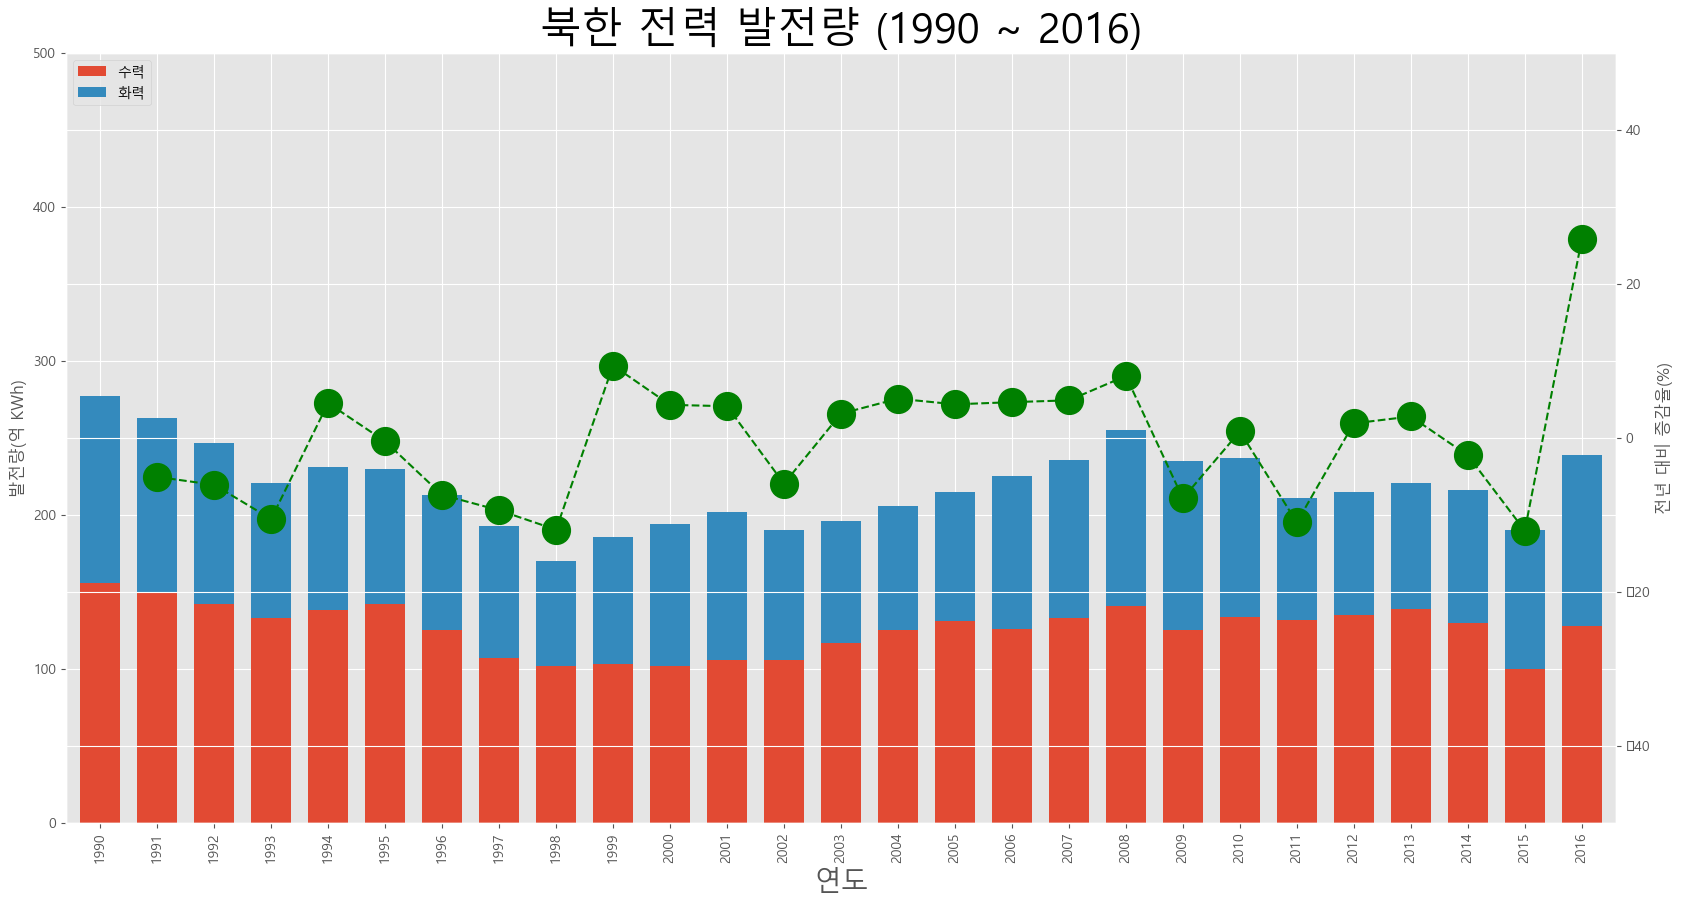

In [197]:
ax1 = df[['수력', '화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True )
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

#2015년 수력 발전량이 일시적으로 급감 / 기사를 검색해 보면 2015년 북한의 가뭄이 심각했다는 뉴스를 찾을 수 있었다. 

##### 02-4. 히스토그램
    * 단변수 분석

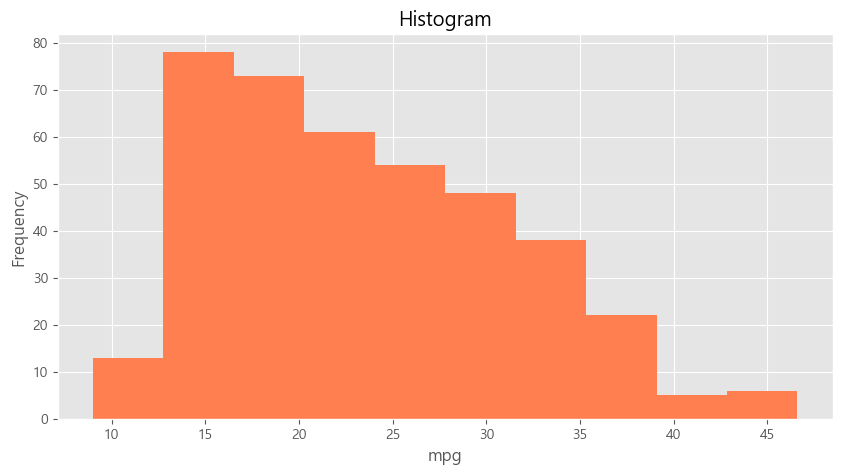

In [200]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

# 자동차 연비 값은 대부분 좌측으로 편향되어 있어 연비가 낮은 구간에 집중되는 경향을 보임. 

##### 02-5. 산점도

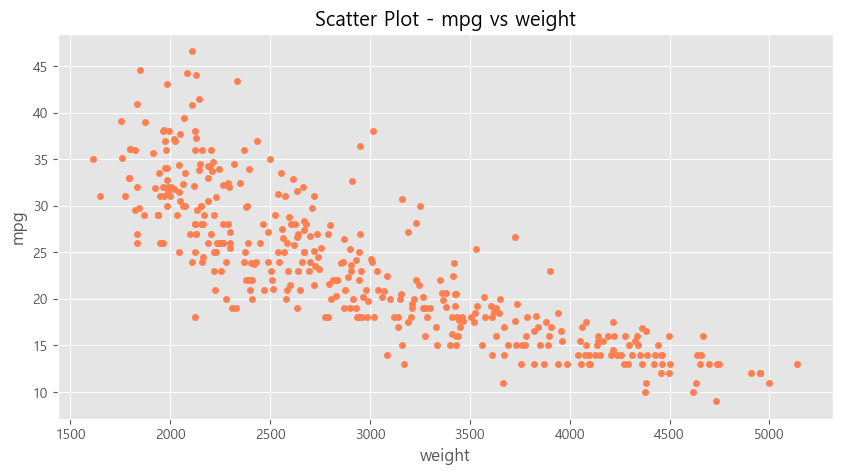

In [203]:
df.plot(kind='scatter', x = 'weight', y='mpg', color='coral', figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

* 버블 차트
    * 점의 크기에 변화를 줘서 값의 크기를 나타냄

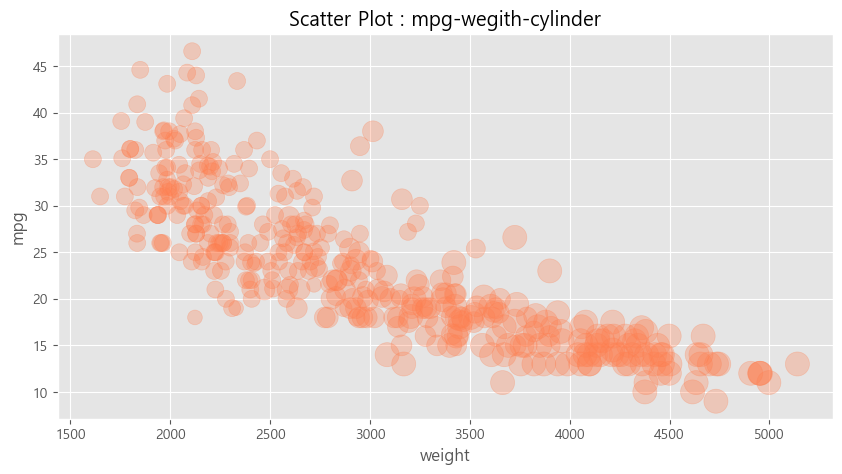

In [206]:
cylinders_size = df.cylinders / df.cylinders.max() * 300
df.plot(kind='scatter', x = 'weight', y='mpg', color='coral', figsize=(10,5), 
s= cylinders_size, alpha=0.3)

plt.title('Scatter Plot : mpg-wegith-cylinder')
plt.show()

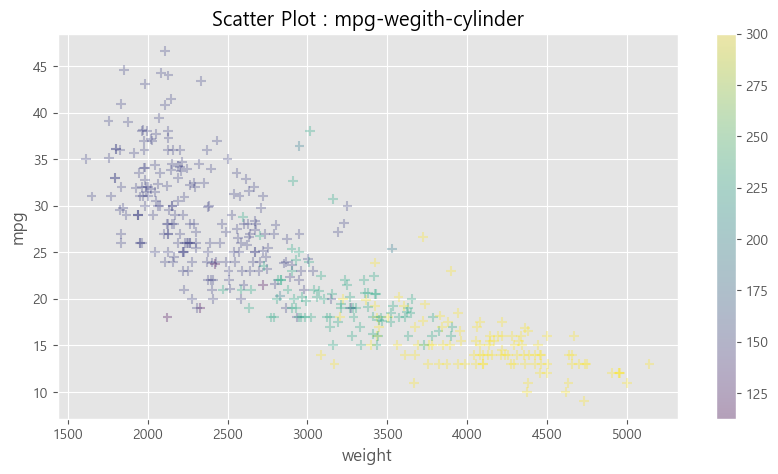

In [212]:
cylinders_size = df.cylinders / df.cylinders.max() * 300
df.plot(kind='scatter', x = 'weight', y='mpg', marker='+', figsize=(10,5), cmap='viridis',
c=cylinders_size, s=50, alpha=0.3)

plt.title('Scatter Plot : mpg-wegith-cylinder')

plt.savefig("./output/scatter.png")
plt.savefig("./output/scatter_transparent.png", transparent=True)


plt.show()

##### 02-6. 파이차트

          mpg  cylinders  displacement  \
USA    5000.8       1556       61229.5   
EU     1952.4        291        7640.0   
JAPAN  2405.6        324        8114.0   

                                              horsepower    weight  \
USA    130.0165.0150.0150.0140.0198.0220.0215.0225.01...  837121.0   
EU     46.0087.0090.0095.00113.090.0070.0076.0060.005...  169631.0   
JAPAN  95.0088.0088.0095.0065.0069.0095.0097.0092.009...  175477.0   

       acceleration  model year  \
USA          3743.4       18827   
EU           1175.1        5307   
JAPAN        1277.6        6118   

                                                    name  count  
USA    chevrolet chevelle malibubuick skylark 320plym...    249  
EU     volkswagen 1131 deluxe sedanpeugeot 504audi 10...     70  
JAPAN  toyota corona mark iidatsun pl510datsun pl510t...     79  


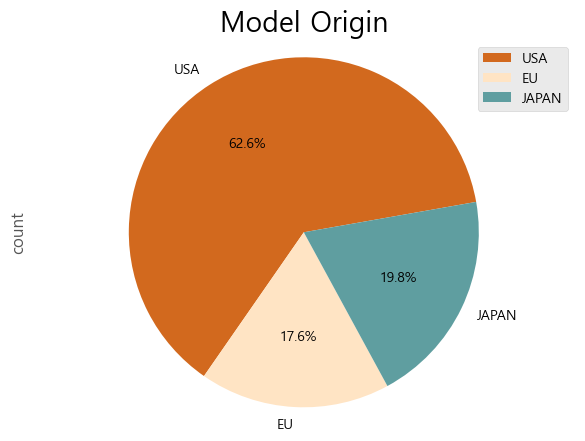

In [218]:

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 개수 카운트를 위해 값1을 가진 열을 추가
df['count']=1
df_origin = df.groupby('origin').sum()  #oringin 열을 기준으로 그룹화, 합계 연산
df_origin.index = ['USA', 'EU', 'JAPAN']
print(df_origin.head())

df_origin['count'].plot(kind='pie', 
                       figsize=(7,5), 
                       autopct= '%1.1f%%', 
                       startangle = 10, 
                       colors= ['chocolate', 'bisque', 'cadetblue']
                       )


plt.title('Model Origin', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

##### 02-7. 박스 플롯 

C:\Users\USER\AppData\Local\Temp\ipykernel_16868\2811880933.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(x=[df[df['origin']==1]['mpg'],
C:\Users\USER\AppData\Local\Temp\ipykernel_16868\2811880933.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(x=[df[df['origin']==1]['mpg'],


<function matplotlib.pyplot.show(close=None, block=None)>

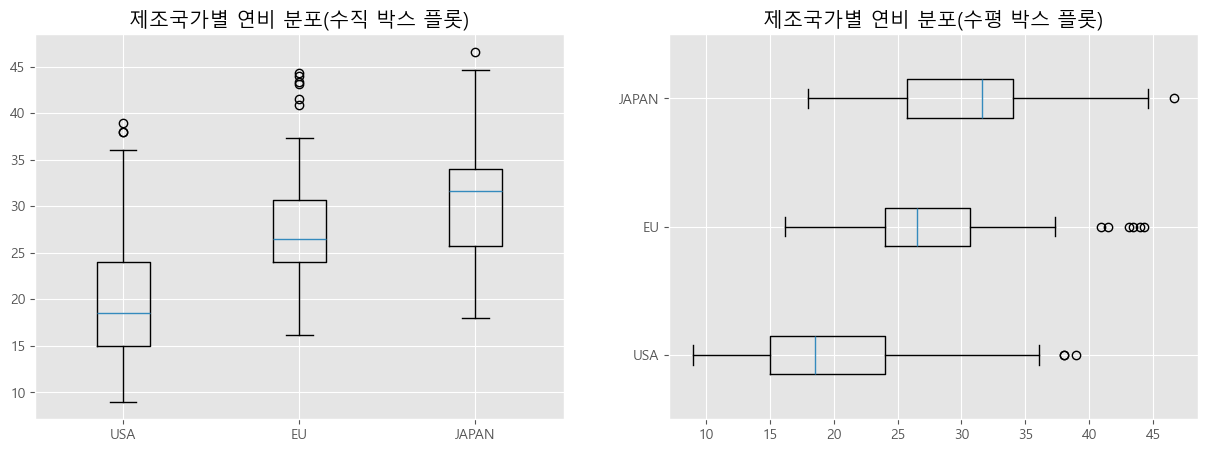

In [221]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA', 'EU', 'JAPAN'], 
            vert=False)
ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show


### 03. seaborn

### 04.folium(지도)